# 01. Importing libraries & data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/Hempe/Google Drive/CareerFoundry/6_Advanced Analytics & Dashboard Design/FIFA 21 Data Analysis/'

In [5]:
# Import FIFA 21 Data Set players_21_cleaned_new.csv
df_players_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'players_21_cleaned_new.csv'), index_col = False)

In [6]:
df_players_cleaned.shape

(18944, 97)

In [7]:
df_players_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0,0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,1,1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,2,2,200389,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,3,3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,4,4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [8]:
pd.set_option('display.max_columns', None)
df_players_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,overall_fifa_score,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0,0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,138400000.0,CAM,2004-07-01,2021.0,RW,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,1,1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,92,92,46000000,220000,"ST, LW",Right,5,4,5,75900000.0,LS,2018-07-10,2022.0,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,2,2,200389,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,91,93,75000000,125000,GK,Right,3,3,1,159400000.0,GK,2014-07-16,2023.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,3,3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,91,91,80000000,240000,ST,Right,4,4,4,132000000.0,ST,2014-07-01,2023.0,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,4,4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,91,91,90000000,270000,"LW, CAM",Right,5,5,5,166500000.0,LW,2017-08-03,2022.0,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


# 02. Remove categorical columns

In [25]:
# remove categorical columns from “players_21_cleaned_new.csv”
df_players_cleaned_new = df_players_cleaned.drop(columns = ['Unnamed: 0','Unnamed: 0.1','dob','short_name', 'long_name', 'nationality', 'club_name', 'league_name','player_positions', 'preferred_foot','release_clause_eur','team_position','joined','contract_valid_until','nation_position','pace','shooting','passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb'])

In [26]:
pd.set_option('display.max_columns', None)
df_players_cleaned_new.head()

,sofifa_id,age,height_cm,weight_kg,overall_fifa_score,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,33,170,72,93,93,67500000,560000,5,4,4,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8
1,20801,35,187,83,92,92,46000000,220000,5,4,5,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11
2,200389,27,188,87,91,93,75000000,125000,3,3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90
3,188545,31,184,80,91,91,80000000,240000,4,4,4,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10
4,190871,28,175,68,91,91,90000000,270000,5,5,5,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11


# 03. The elbow technique

In [27]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [28]:
score = [kmeans[i].fit(df_players_cleaned_new).score(df_players_cleaned_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4.9320919034320915e+17,
 -2.0735292591642198e+17,
 -9.479112280479874e+16,
 -5.477450653227195e+16,
 -3.773602671346103e+16,
 -2.658002412299761e+16,
 -1.8940954093885224e+16,
 -1.4598877818002482e+16,
 -1.188910910203572e+16]

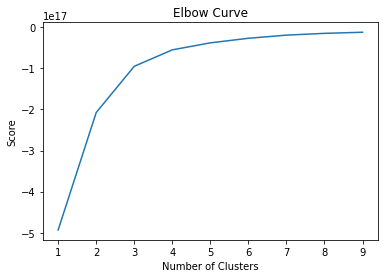

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Here we can see a large jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is four.

# 04. k-means clustering

In [30]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [31]:
# Fit the k-means object to the data.

kmeans.fit(df_players_cleaned_new)

/Users/Hempe/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [32]:
df_players_cleaned_new['clusters'] = kmeans.fit_predict(df_players_cleaned_new)

/Users/Hempe/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [33]:
df_players_cleaned_new.head()

,sofifa_id,age,height_cm,weight_kg,overall_fifa_score,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,clusters
0,158023,33,170,72,93,93,67500000,560000,5,4,4,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,3
1,20801,35,187,83,92,92,46000000,220000,5,4,5,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,3
2,200389,27,188,87,91,93,75000000,125000,3,3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,3
3,188545,31,184,80,91,91,80000000,240000,4,4,4,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,3
4,190871,28,175,68,91,91,90000000,270000,5,5,5,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,3


In [34]:
df_players_cleaned_new['clusters'].value_counts()

0    16527
2     2019
1      330
3       68
Name: clusters, dtype: int64

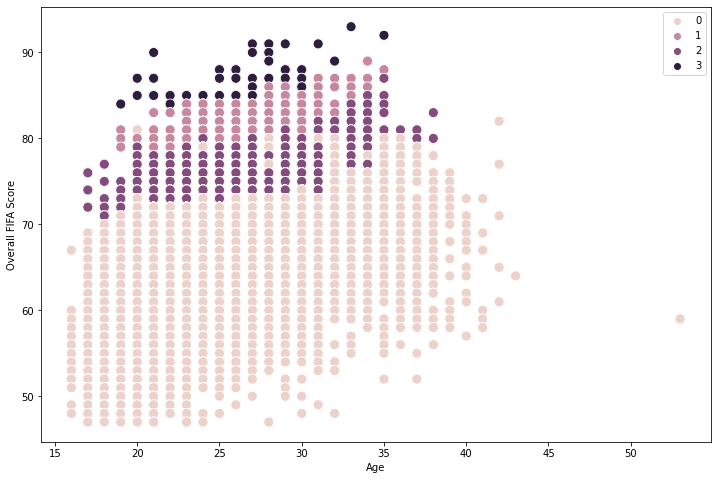

In [35]:
# Plot the clusters for the "Overall Fifa Score" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_players_cleaned_new['age'], y=df_players_cleaned_new['overall_fifa_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Overall FIFA Score') # Label y-axis.
plt.show()

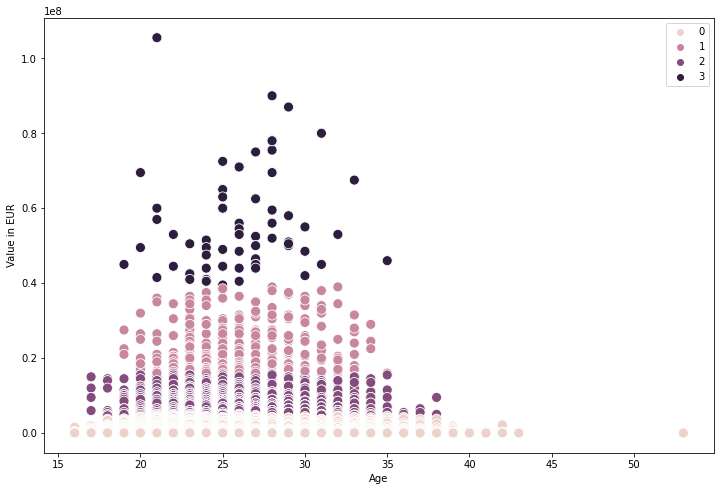

In [41]:
# Plot the clusters for the "value_eur" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_players_cleaned_new['age'], y=df_players_cleaned_new['value_eur'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('Value in EUR') 
plt.show()

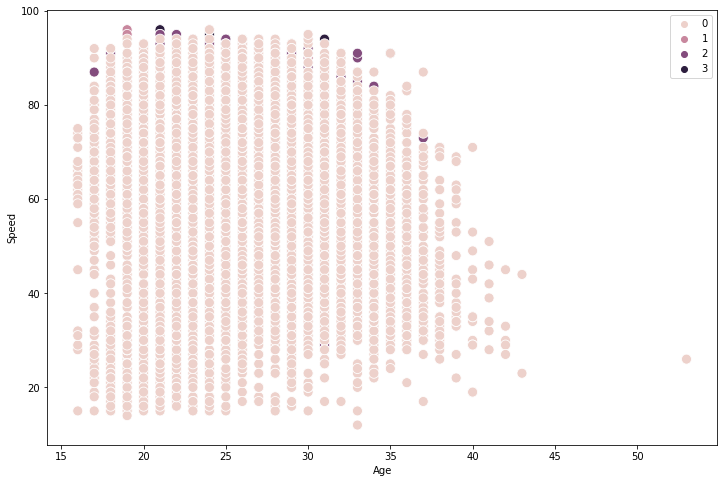

In [37]:
# Plot the clusters for the "movement_sprint_speed" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_players_cleaned_new['age'], y=df_players_cleaned_new['movement_sprint_speed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('Speed') 
plt.show()

In [38]:
df_players_cleaned_new.loc[df_players_cleaned_new['clusters'] == 3, 'cluster'] = 'navy'
df_players_cleaned_new.loc[df_players_cleaned_new['clusters'] == 2, 'cluster'] = 'dark purple'
df_players_cleaned_new.loc[df_players_cleaned_new['clusters'] == 1, 'cluster'] = 'purple'
df_players_cleaned_new.loc[df_players_cleaned_new['clusters'] == 0, 'cluster'] = 'pink'

In [40]:
df_players_cleaned_new.groupby('cluster').agg({'age':['mean', 'median'], 
                         'movement_sprint_speed':['mean', 'median'], 
                         'overall_fifa_score':['mean', 'median'],
                          'value_eur':['mean', 'median']})

age        movement_sprint_speed        overall_fifa_score  \
                  mean median                  mean median               mean   
cluster                                                                         
dark purple  26.356612     26             70.176325     72          75.855869   
navy         26.191176     26             77.264706     78          86.941176   
pink         25.062080     24             63.373207     66          64.022206   
purple       26.309091     26             73.612121     76          81.939394   

                       value_eur            
            median          mean    median  
cluster                                     
dark purple     75  8.180584e+06   7500000  
navy            87  5.534559e+07  51250000  
pink            65  8.612732e+05    525000  
purple          82  2.312879e+07  21000000

The best players are grouped in the blue cluster. This statement is proved by the median and mean of speed, overall score and the market value of the players. Interesting to see is that mean of age is not that different for each cluster - besides cluster "pink".